# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [29]:
import pandas as pd

# Load California housing data
df = pd.read_csv('../data/housing.csv', comment='#')



# Quick check
print(housing.head())
print(housing.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [30]:
#print(df.columns.tolist())
df.columns
df.head()
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())


In [33]:
print(df.columns.tolist())


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [34]:
df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

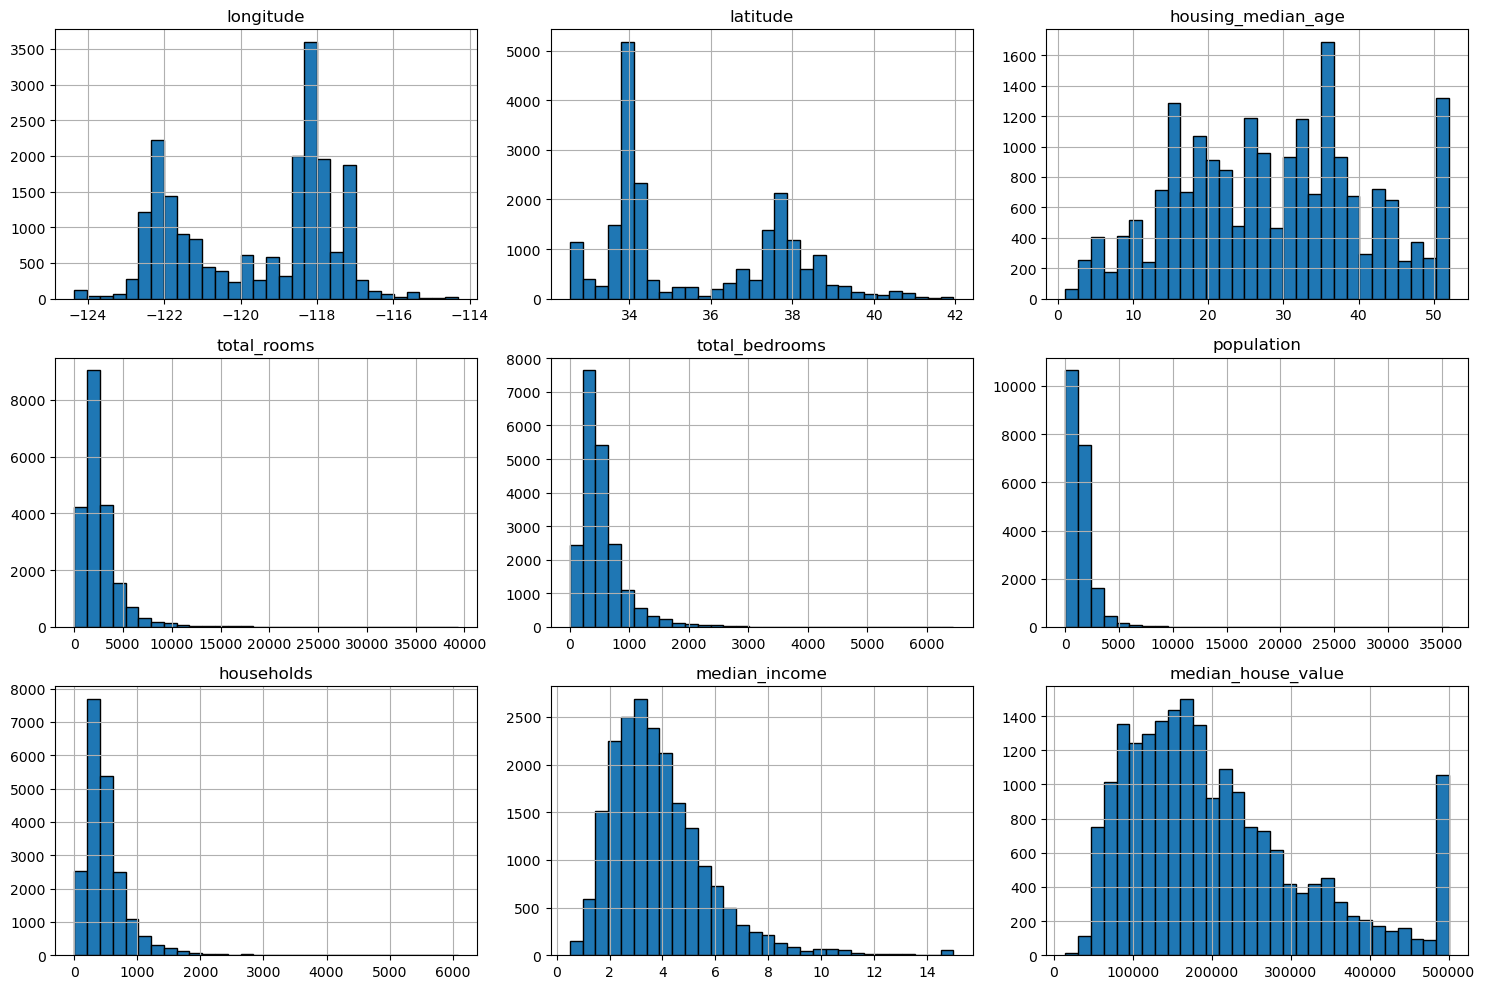

In [35]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()


In [40]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_ratio'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']


In [43]:
df['bedrooms_ratio']

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Name: bedrooms_ratio, Length: 20640, dtype: float64

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [44]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_ratio,population_per_household


In [45]:
df = df.dropna()


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [46]:
# 1. Rooms per household
df['rooms_per_household'] = df['total_rooms'] / df['households']

# 2. Population per household
df['population_per_household'] = df['population'] / df['households']

# 3. Bedrooms per room
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


In [47]:
df[['rooms_per_household', 'population_per_household', 'bedrooms_per_room']].head()


,rooms_per_household,population_per_household,bedrooms_per_room
0,6.984127,2.555556,0.146591
1,6.238137,2.109842,0.155797
2,8.288136,2.802260,0.129516
3,5.817352,2.547945,0.184458
4,6.281853,2.181467,0.172096


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [52]:
print(df['rooms_per_household'].sort_values().head(5))   # Smallest values
print(df['rooms_per_household'].sort_values(ascending=False).head(5))  # Largest values


5916     0.846154
8219     0.888889
3126     1.000000
17820    1.130435
14818    1.130435
Name: rooms_per_household, dtype: float64
1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: rooms_per_household, dtype: float64


In [53]:

print(df['rooms_per_household'].sort_values().head())
print(df['rooms_per_household'].sort_values(ascending=False).head())


5916     0.846154
8219     0.888889
3126     1.000000
17820    1.130435
14818    1.130435
Name: rooms_per_household, dtype: float64
1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: rooms_per_household, dtype: float64


In [58]:
# Smallest values
print(df[['rooms_per_household']].sort_values('rooms_per_household').head())

# Largest values
print(df[['rooms_per_household']].sort_values('rooms_per_household', ascending=False).head())


       rooms_per_household
3126              1.000000
17820             1.130435
14818             1.130435
4552              1.260870
4550              1.378486
       rooms_per_household
11832            41.333333
11833            39.755906
1872             38.840909
20094            37.063492
1926             37.000000


<Axes: >

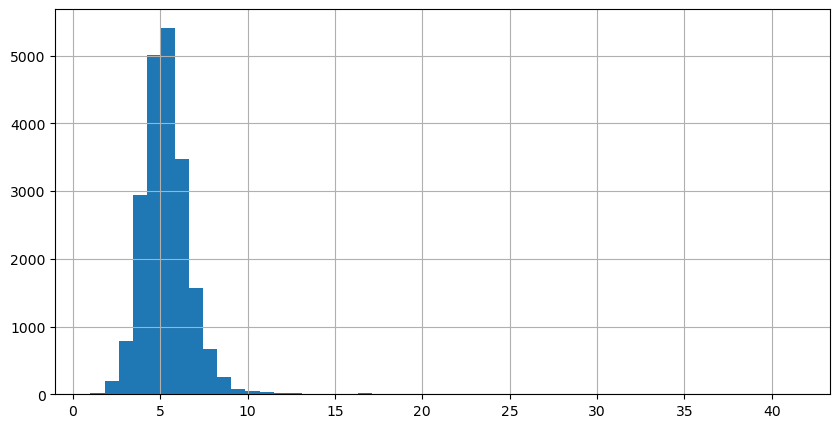

In [59]:

#df = df.drop(index=[1912, 9676, 11707, 2395, 1240])
df['rooms_per_household'].hist(bins=50, figsize=(10, 5))



In [60]:
q_low = df['rooms_per_household'].quantile(0.01)
q_high = df['rooms_per_household'].quantile(0.99)

df = df[(df['rooms_per_household'] >= q_low) & (df['rooms_per_household'] <= q_high)]


In [61]:
df['rooms_per_household'].describe()


count    20210.000000
mean         5.308756
std          1.197514
min          2.592006
25%          4.461315
50%          5.227934
75%          6.026696
max         10.168591
Name: rooms_per_household, dtype: float64

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

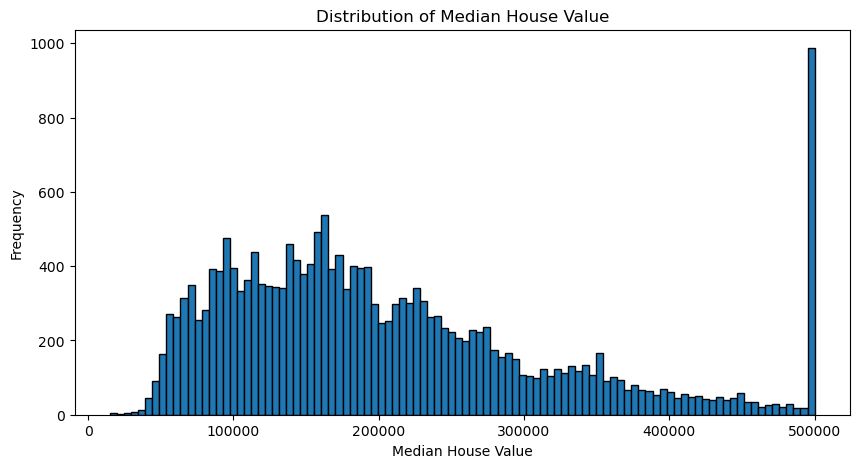

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['median_house_value'].hist(bins=100, edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


2. Check out what variables correlates the most with "median house value"

In [64]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix['median_house_value'].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.696973
rooms_per_household         0.340294
total_rooms                 0.137546
housing_median_age          0.106213
households                  0.063084
total_bedrooms              0.050280
population_per_household   -0.023886
population                 -0.028474
longitude                  -0.045253
latitude                   -0.143890
bedrooms_ratio             -0.243660
bedrooms_per_room          -0.243660
Name: median_house_value, dtype: float64

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

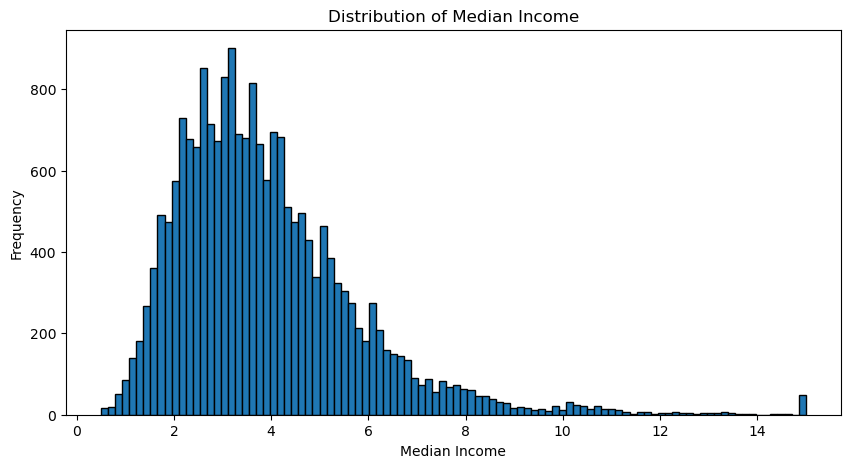

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['median_income'].hist(bins=100, edgecolor='black')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

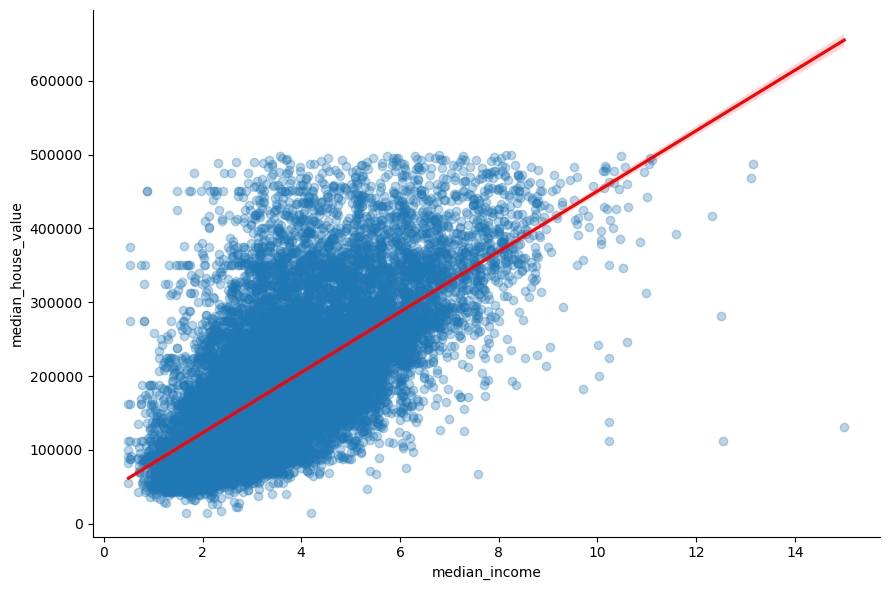

In [68]:
import seaborn as sns
df = df[df['median_house_value'] < 500000]

sns.lmplot(
    data=df,
    x='median_income',
    y='median_house_value',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha':0.3},  # Makes points more transparent
    line_kws={'color': 'red'}
)


5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

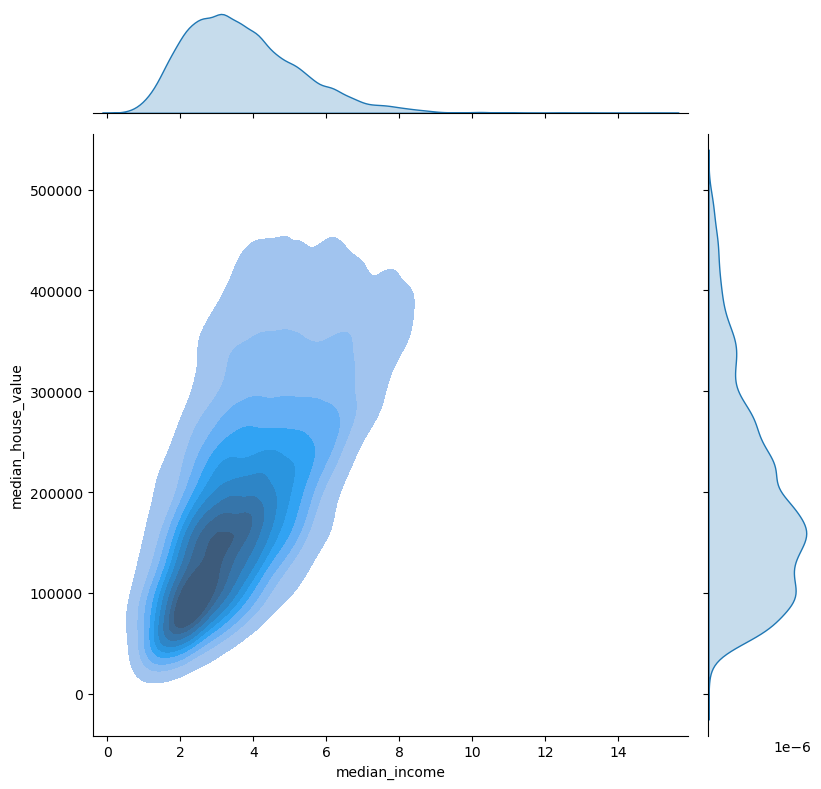

In [69]:
import seaborn as sns

sns.jointplot(
    data=df,
    x='median_income',
    y='median_house_value',
    kind='kde',
    height=8,
    fill=True  # optional: fills the contours
)


#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [71]:
# Define the quantile-based bins
income_bins = df['median_income'].quantile([0, 0.25, 0.5, 0.75, 0.95, 1.0]).values

# Create labels
income_labels = ['Low', 'Below_Average', 'Above_Average', 'High', 'Very High']

# Create the new categorical column
df['income_cat'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels, include_lowest=True)

df['income_cat'].value_counts()



income_cat
Above_Average    4813
Low              4812
Below_Average    4809
High             3846
Very High         961
Name: count, dtype: int64

2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

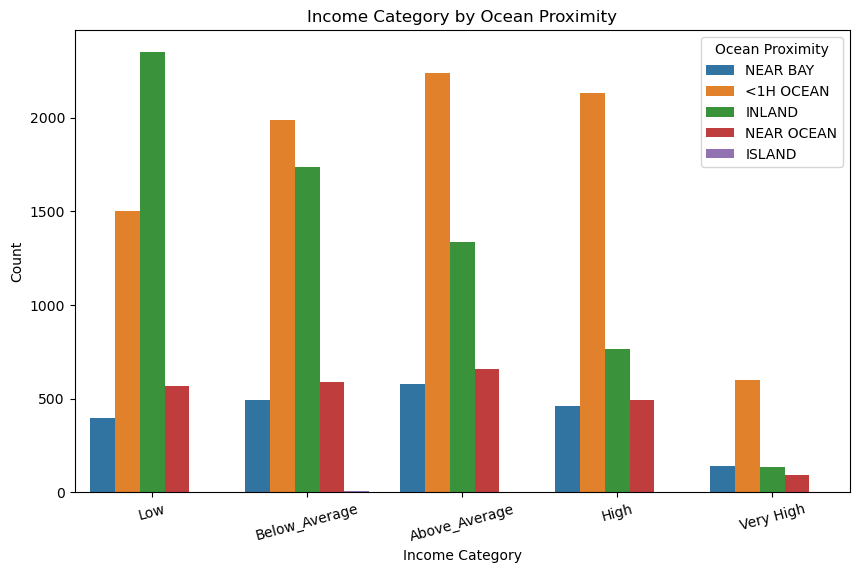

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income_cat', hue='ocean_proximity')
plt.title('Income Category by Ocean Proximity')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.legend(title='Ocean Proximity')
plt.show()


3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

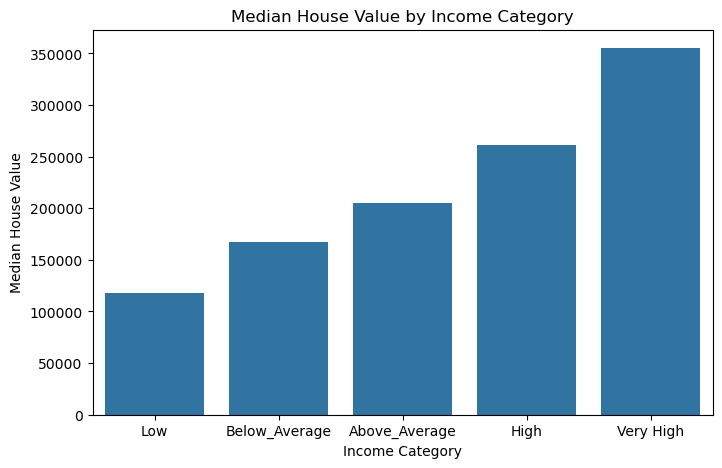

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='income_cat', y='median_house_value', errorbar=None)
plt.title('Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.show()


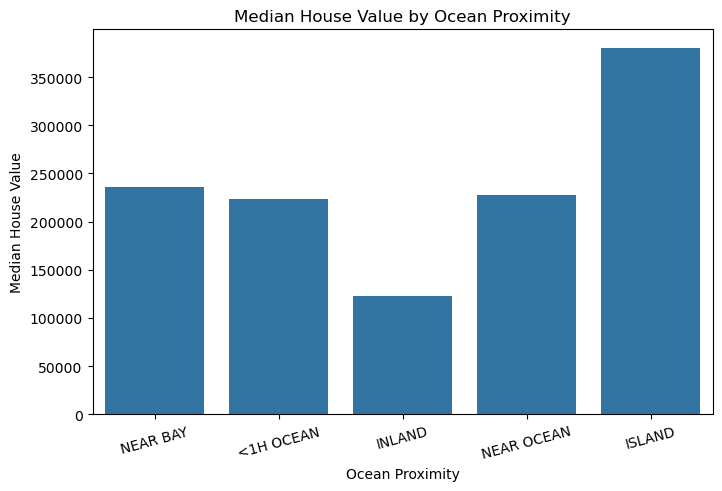

In [74]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', errorbar=None)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=15)
plt.show()


4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [75]:
# Step 1: Create the pivot table
pivot_df = pd.pivot_table(
    df,
    index='income_cat',
    columns='ocean_proximity',
    aggfunc='size',  # counts number of occurrences
    fill_value=0     # fill missing with 0
)

# Step 2: Drop the ISLAND column (if present)
pivot_df = pivot_df.drop(columns='ISLAND', errors='ignore')

# Step 3: Show it
pivot_df


/var/folders/m2/12hw6p5106x98ycbwzpq3hsh0000gn/T/ipykernel_90664/1983638831.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = pd.pivot_table(


ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,1500,2350,395,566
Below_Average,1987,1736,494,588
Above_Average,2239,1336,578,660
High,2131,763,461,491
Very High,598,132,138,93


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

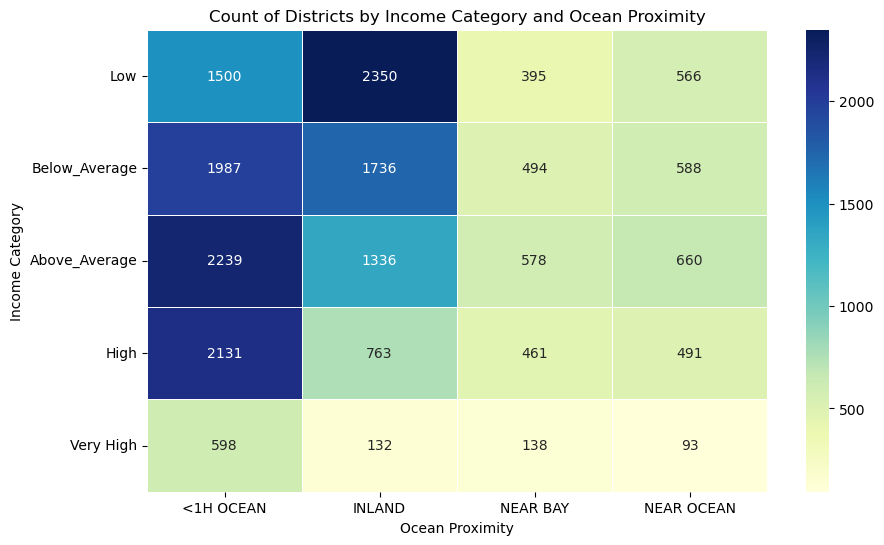

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_df,
    annot=True,            # show numbers inside boxes
    fmt='d',               # format as integer
    cmap='YlGnBu',         # color scheme (optional)
    linewidths=0.5         # light borders between cells
)
plt.title('Count of Districts by Income Category and Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Income Category')
plt.show()


# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [77]:
df = df.drop(columns='income_cat')


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [78]:
import scipy.stats as stats

In [81]:
float_cols = df.select_dtypes(include='float64')  # or float
z_scored = float_cols.apply(lambda col: stats.zscore(col))


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [82]:
# Convert categorical column into dummy variables
dummies = pd.get_dummies(df['ocean_proximity'], drop_first=True)

# Merge with original dataframe (excluding the original column)
df = pd.concat([df.drop(columns='ocean_proximity'), dummies], axis=1)


4. Save our predicting variable to `y`.

In [83]:
y = df['median_house_value']


5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [85]:
# Concatenate scaled numeric features and dummy variables
X = pd.concat([z_scored, dummies], axis=1)

# Drop the target column (just in case it's still there)
X = X.drop(columns='median_house_value', errors='ignore')


# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test set
    random_state=42     # ensures reproducibility
)


#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



LinearRegression()

In [ ]:
model.fit(X_train, y_train)

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

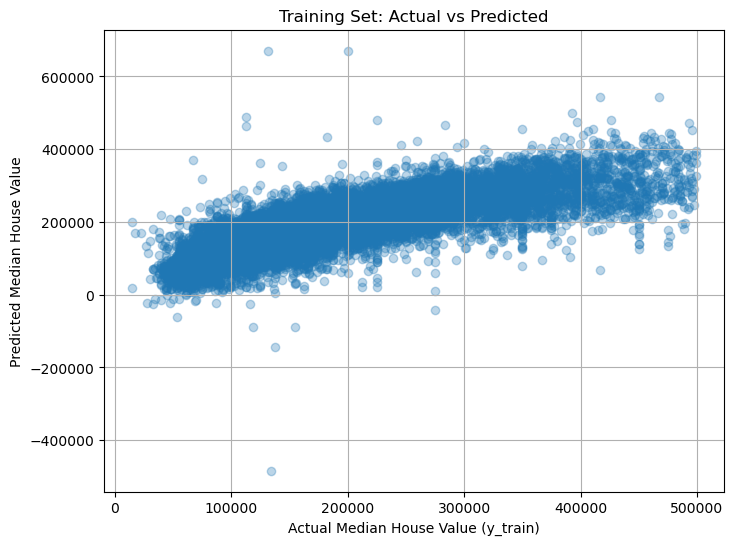

In [88]:
import matplotlib.pyplot as plt

# Get predictions
y_train_pred = model.predict(X_train)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel("Actual Median House Value (y_train)")
plt.ylabel("Predicted Median House Value")
plt.title("Training Set: Actual vs Predicted")
plt.grid(True)
plt.show()


4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [89]:
from sklearn import metrics

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 3488921061.32
R² Score: 0.6277


In [92]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 59067.09


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

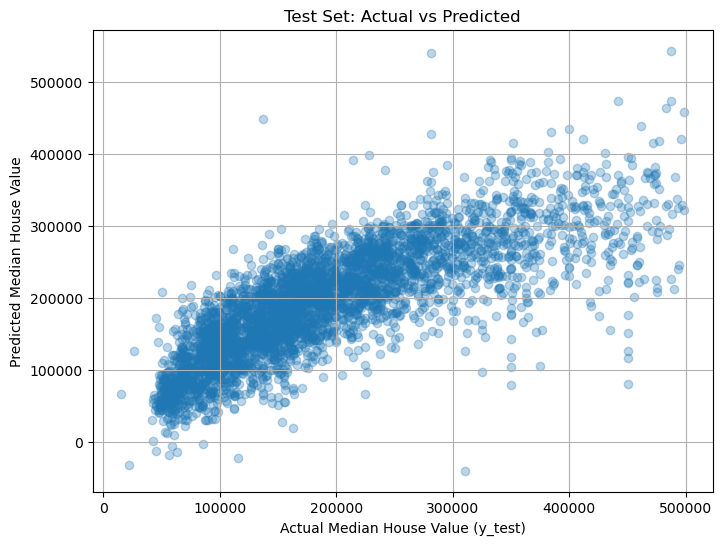

In [93]:
y_test_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Median House Value")
plt.title("Test Set: Actual vs Predicted")
plt.grid(True)
plt.show()


2. Print the mean_squared_error and R^2-score again. What has happened?

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# Metrics on test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print results
print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Test R² Score: {r2_test:.4f}")


Test Mean Squared Error (MSE): 3694647063.68
Test Root Mean Squared Error (RMSE): 60783.61
Test R² Score: 0.6239


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [95]:
mse_test = mean_squared_error(y_test, y_test_pred)
import numpy as np

rmse_test = np.sqrt(mse_test)
print(f"Test RMSE: {rmse_test:.2f}")


Test RMSE: 60783.61


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [96]:
# Create the DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

# Show first few rows
comparison_df.head()


,Actual,Predicted
18643,215600.0,248068.007123
15933,233000.0,182599.357914
1643,162500.0,122612.775157
11070,247300.0,245808.046713
8382,170000.0,175011.152409


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [97]:
comparison_df['Error'] = comparison_df['Predicted'] - comparison_df['Actual']


In [98]:
comparison_df['Error']

18643    32468.007123
15933   -50400.642086
1643    -39887.224843
11070    -1491.953287
8382      5011.152409
             ...     
16830     4533.556644
759      15939.747723
18659   -27826.401268
183      58305.559037
11141    28949.545388
Name: Error, Length: 3849, dtype: float64

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [99]:
# Create absolute error column
comparison_df['Absolute_Error'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])

# Calculate the mean
mae = comparison_df['Absolute_Error'].mean()

print(f"Mean Absolute Error (MAE): ${mae:.2f}")


Mean Absolute Error (MAE): $44525.80


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [103]:
y_test_pred_rf = rf_model.predict(X_test)


In [104]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE & RMSE
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# R²
r2_rf = r2_score(y_test, y_test_pred_rf)

# MAE
mae_rf = abs(y_test - y_test_pred_rf).mean()

# Print
print(f"Random Forest - R²: {r2_rf:.4f}")
print(f"Random Forest - RMSE: ${rmse_rf:.2f}")
print(f"Random Forest - MAE: ${mae_rf:.2f}")


Random Forest - R²: 0.7934
Random Forest - RMSE: $45048.06
Random Forest - MAE: $29981.70


2. Make prediction on the test data and evaluate you results.